<a href="https://colab.research.google.com/github/AliaaElshamekh/Parameter-tuning-and-Cross-validation-with-different-classifiers/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import warnings
import matplotlib.pyplot as plt
import math 
from sklearn.metrics import mean_squared_error 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import validation_curve

# *Load* *data*



In [ ]:
X_traindf = pd.read_csv('X_train.csv')
X_testdf = pd.read_csv('X_test.csv')
y_traindf = pd.read_csv('y_train.csv')
y_testdf = pd.read_csv('y_test.csv')
X_traindf.head()


,0.0,1.0,1.0.1,0.0.1,1.0.2,1.0.3,1.0.4,1.0.5,1.0.6,1.0.7,0.0.2,0.0.3,1.0.8,1.0.9,1.0.10,1.0.11,1.0.12,1.0.13,1.0.14,1.0.15,0.0.4,1.0.16,1.0.17,0.0.5,0.0.6,1.0.18,1.0.19,0.0.7,1.0.20,0.0.8,1.0.21,0.0.9,1.0.22,1.0.23,0.0.10,1.0.24,1.0.25,0.0.11,1.0.26,1.0.27,...,0.0.864,0.0.865,0.0.866,0.0.867,0.0.868,0.0.869,0.0.870,0.0.871,0.0.872,0.0.873,0.0.874,0.0.875,0.0.876,1.0.96,0.0.877,0.0.878,0.0.879,0.0.880,0.0.881,0.0.882,0.0.883,0.0.884,0.0.885,0.0.886,0.0.887,0.0.888,0.0.889,0.0.890,0.0.891,0.0.892,0.0.893,0.0.894,0.0.895,0.0.896,0.0.897,0.0.898,0.0.899,0.0.900,0.0.901,0.0.902
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_traindf.head()

,1.0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [ ]:
#Let's create numpy arrays for X and y
X_train = X_traindf.values
X_test = X_testdf.values
y_train = y_traindf.values
y_test = y_testdf.values

# Logistic regression

In [ ]:
# K-fold CV
scores = []
LR = LogisticRegression()
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    LR.fit(X_train_fold, y_train_fold)
    scores.append(LR.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", LR.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", LR.score(X_test_fold, y_test_fold))

    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8839404768254306
  - Testing score =  0.85552
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8826070723771935
  - Testing score =  0.85504
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8846871833164436
  - Testing score =  0.85232
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.88336
  - Testing score =  0.8617378780604896


In [ ]:
# Option #2 

LR_score_all = cross_val_score(LR, X_train, y_train, cv=4)


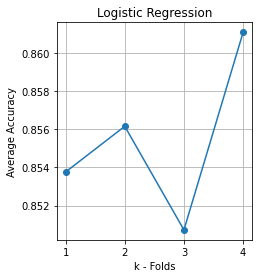

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("Logistic Regression")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),LR_score_all,'o-');



In [ ]:
print(np.mean(scores))

0.8561544695151224


In [ ]:
LR.score(X_test,y_test)

0.8536741469658786

In [ ]:
# Get param names
LR.coef_

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
c_vals = np.logspace(0,4,10)
params = dict(C=c_vals)

lrgrid = GridSearchCV(LR, param_grid=params, n_jobs=-1, cv=4,refit=True, verbose=5)
lrgrid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%lrgrid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%lrgrid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%lrgrid.best_score_)
print('Best Parameters : ',lrgrid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.0min finished


Train Accuracy : 0.882
Test Accuracy : 0.859
Best Accuracy Through Grid Search : 0.855
Best Parameters :  {'C': 7.742636826811269}


In [ ]:
 
 
feature_importances_ls = pd.DataFrame(lrgrid.best_estimator_.coef_[0],
                                   index = X_traindf.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances_ls


,importance
0.0.599,1.558034
0.0.244,1.270120
0.0.801,1.203089
0.0.615,1.202644
0.0.322,1.178177
...,...
0.0.658,-1.508252
0.0.295,-1.534538
0.0.766,-1.916361
0.0.178,-1.929045


No handles with labels found to put in legend.


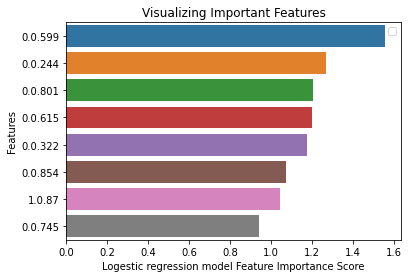

In [ ]:
ls_feature_imp = pd.Series(lrgrid.best_estimator_.coef_[0],X_traindf.columns).sort_values(ascending=False)
ls_feature_imp
sns.barplot(x=ls_feature_imp[0:8], y=ls_feature_imp.index[0:8])
# Add labels to your graph
plt.xlabel('Logestic regression model Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
lrgrid.cv_results_

{'mean_fit_time': array([6.14, 5.71, 5.65, 5.72, 5.66, 5.58, 5.67, 5.54, 5.57, 5.44]),
 'mean_score_time': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]),
 'mean_test_score': array([0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.85, 0.86, 0.85, 0.85]),
 'param_C': masked_array(data=[1.0, 2.7825594022071245, 7.742636826811269,
                    21.544346900318832, 59.94842503189409,
                    166.81005372000593, 464.15888336127773,
                    1291.5496650148827, 3593.813663804626, 10000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0},
  {'C': 2.7825594022071245},
  {'C': 7.742636826811269},
  {'C': 21.544346900318832},
  {'C': 59.94842503189409},
  {'C': 166.81005372000593},
  {'C': 464.15888336127773},
  {'C': 1291.5496650148827},
  {'C': 3593.813663804626},
  {'C': 10000.0}],
 'rank_test_score': array([ 2,  4,  1

In [ ]:
lrgrid.score(X_test,y_test)

0.858874354974199

In [ ]:

train_scores, test_scores = validation_curve(LR, X_train, y_train, param_name="C", param_range=c_vals,
    scoring="accuracy", n_jobs=1,cv = 4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


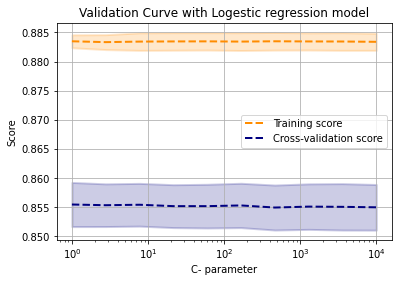

In [ ]:

plt.title("Validation Curve with Logestic regression model")
plt.xlabel(r"C- parameter")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(c_vals, train_scores_mean, label="MeanTraining score",
             color="darkorange", lw=lw ,ls='--')
plt.fill_between(c_vals, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(c_vals, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw,ls='--')
plt.fill_between(c_vals, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

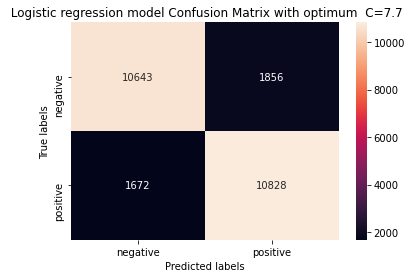

In [ ]:

import matplotlib.pyplot as plt     
cnf_matrix = confusion_matrix(y_test,lrgrid.predict(X_test))
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Logistic regression model Confusion Matrix with optimum  C=7.7'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# Bernoulli Naive Bayes

In [ ]:
# K-fold CV for Naive Bayes
scores = []
NB = BernoulliNB()
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    NB.fit(X_train_fold, y_train_fold)
    scores.append(NB.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", NB.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", NB.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8171102458797802
  - Testing score =  0.80464
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8212704677582804
  - Testing score =  0.81952
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8138567390260814
  - Testing score =  0.8024
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.8232533333333333
  - Testing score =  0.8278124499919988


In [ ]:
NB_score_all = cross_val_score(NB, X_train, y_train, cv=4)

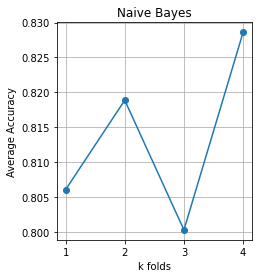

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("Naive Bayes")
plt.xlabel("k folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),NB_score_all,'o-');

In [ ]:
params = {'alpha': [0.0001,0.001,0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=4, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    9.7s finished


Train Accuracy : 0.818
Test Accuracy : 0.815
Best Accuracy Through Grid Search : 0.813
Best Parameters :  {'alpha': 0.01}


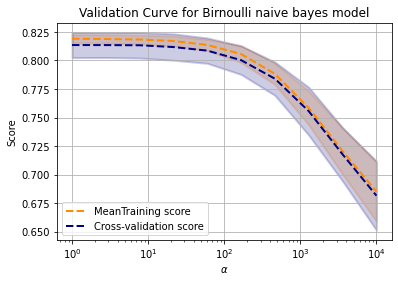

In [ ]:
alphas = np.array([0.0001,0.001,0.01, 0.1, 0.5, 1.0, 10.0])
train_scores, test_scores = validation_curve(NB, X_train, y_train, param_name="alpha", param_range=c_vals,
    scoring="accuracy", n_jobs=1,cv = 4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Birnoulli naive bayes model")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(c_vals, train_scores_mean, label="MeanTraining score",
             color="darkorange", lw=lw ,ls='--')
plt.fill_between(c_vals, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(c_vals, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw,ls='--')
plt.fill_between(c_vals, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
cnf_matrix = confusion_matrix(y_test,bernoulli_nb_grid.predict(X_test))
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title( ' Naive Bayes model Confusion Matrix with optimum \u03B1 = 0.01 ' ); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

SyntaxError: ignored

# Random Forest Classifier

In [ ]:
# K-fold CV
scores = []
forest = RandomForestClassifier (n_estimators=50, random_state=2)
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    forest.fit(X_train_fold, y_train_fold)
    scores.append(forest.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", forest.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", forest.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  1.0
  - Testing score =  0.81424
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.9999466638220705
  - Testing score =  0.81584
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.9999466638220705
  - Testing score =  0.80944
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.9999466666666667
  - Testing score =  0.8137301968314931


In [ ]:
forest.score(X_test,y_test)

0.8138325533021321

In [ ]:
# Get param names
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [ ]:
forest_score_all = cross_val_score(forest, X_train, y_train, cv=4)

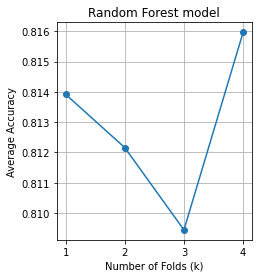

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("Random Forest model")
plt.xlabel("Number of Folds (k)")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),forest_score_all,'o-');

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
rfc = RandomForestClassifier() 
param_grid = { 
    'n_estimators': [10,50,100,150,200]
}
CV_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=4, verbose=5)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=10, score=0.758, total=   1.5s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.749, total=   1.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.758, total=   1.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.762, total=   1.6s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.811, total=   6.6s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.815, total=   6.5s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.807, total=   6.3s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.811, total=   6.3s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.822, total=  12.8s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.828, total=  13.4s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.817, total=  13.1s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.4min finished


{'n_estimators': 200}


In [ ]:
print('Train Accuracy : %.3f'%CV_rfc.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%CV_rfc.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%CV_rfc.best_score_)
print('Best Parameters : ',CV_rfc.best_params_)

Train Accuracy : 1.000
Test Accuracy : 0.833
Best Accuracy Through Grid Search : 0.830
Best Parameters :  {'n_estimators': 200}


In [ ]:
nes = np.array([10,50,100,150,200])
train_scores, test_scores = validation_curve(rfc, X_train, y_train, param_name="n_estimators", param_range=nes,
    scoring="accuracy", n_jobs=1,cv = 4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


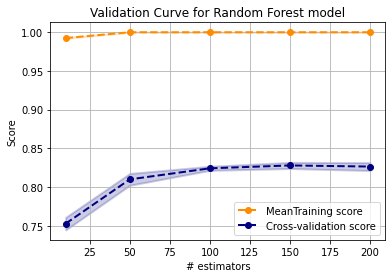

In [ ]:

plt.title("Validation Curve for Random Forest model")
plt.xlabel("# estimators")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
plt.xticks = np.arange(0,200)
lw = 2
#plt.semilogx(nes, train_scores_mean, label="MeanTraining score",
      #       color="darkorange", lw=lw ,ls='--')
plt.fill_between(nes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(nes, test_scores_mean, label="Cross-validation score",
           #  color="navy", lw=lw,ls='--')
plt.fill_between(nes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(nes, train_scores_mean, label="MeanTraining score",
             color="darkorange", lw=lw ,ls='--',marker ='o')

plt.plot(nes, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw,ls='--',marker ='o')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
feature_importances = pd.DataFrame(CV_rfc.best_estimator_.feature_importances_,
                                   index = X_traindf.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_imp = pd.Series(CV_rfc.best_estimator_.feature_importances_,X_traindf.columns).sort_values(ascending=False)
feature_imp

0.0.37     0.026469
0.0.178    0.024009
1.0.42     0.014611
0.0.354    0.013697
0.0.295    0.011918
             ...   
0.0.389    0.000251
1.0.1      0.000012
0.0.1      0.000000
1.0        0.000000
0.0        0.000000
Length: 1000, dtype: float64

No handles with labels found to put in legend.


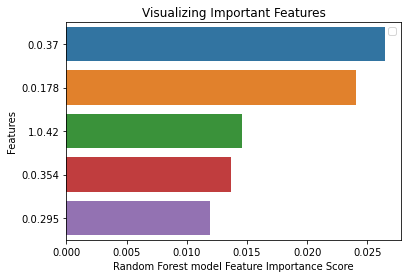

In [ ]:
sns.barplot(x=feature_imp[0:5], y=feature_imp.index[0:5])
# Add labels to your graph
plt.xlabel('Random Forest model Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
feature_importances 

,importance
0.0.37,0.026080
0.0.178,0.023604
1.0.42,0.015443
0.0.354,0.013558
0.0.295,0.012211
...,...
0.0.389,0.000242
1.0.1,0.000009
0.0.1,0.000000
1.0,0.000000


In [ ]:
feature_imp[1:5]

0.0.178    0.023604
1.0.42     0.015443
0.0.354    0.013558
0.0.295    0.012211
dtype: float64

# Gradient Boosted Regression

In [ ]:
# K-fold CV for Gradient Boosted Regression Trees
scores = []
gbt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    gbt.fit(X_train_fold, y_train_fold)
    scores.append(gbt.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", gbt.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", gbt.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8218038295375754
  - Testing score =  0.81296
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8247373193236973
  - Testing score =  0.8152
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8216438210037869
  - Testing score =  0.80576
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.82256
  - Testing score =  0.8206112978076492


In [ ]:
gbt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbt_score_all = cross_val_score(gbt, X_train, y_train, cv=4)

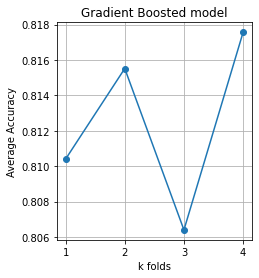

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("Gradient Boosted model")
plt.xlabel("k folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),gbt_score_all,'o-');

In [ ]:
feat_imp = pd.Series(gbt.feature_importances_, X_traindf.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gbt.score(X_test, y_test)))

In [ ]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.001], 'n_estimators':[50,100,250,500]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=4)
tuning.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%tuning.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%tuning.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%tuning.best_score_)
print('Best Parameters : ',tuning.best_params_)

Train Accuracy : 0.920
Test Accuracy : 0.857
Best Accuracy Through Grid Search : 0.856
Best Parameters :  {'learning_rate': 0.15, 'n_estimators': 500}


In [ ]:
nes2=np.array([50,100,250,500])
train_scores, test_scores = validation_curve(GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10),
                                             X_train, y_train, param_name="n_estimators", param_range=nes2,
    scoring="accuracy", n_jobs=1,cv = 4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

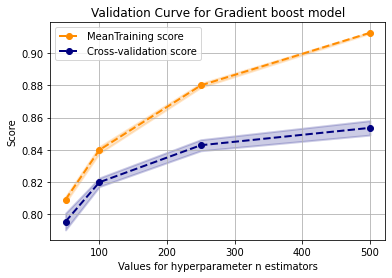

In [ ]:
plt.title("Validation Curve for Gradient boost model")
plt.xlabel("Values for hyperparameter n estimators")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.fill_between(nes2, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.fill_between(nes2, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(nes2, train_scores_mean, label="MeanTraining score",
             color="darkorange", lw=lw ,ls='--',marker ='o')

plt.plot(nes2, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw,ls='--',marker ='o')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
lrs2=np.array([0.15,0.1,0.05,0.01,0.001])
train_scores, test_scores = validation_curve(GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10),
                                             X_train, y_train, param_name="learning_rate", param_range=lrs2,
    scoring="accuracy", n_jobs=1,cv = 4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

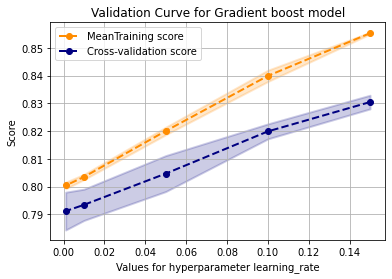

In [ ]:
plt.title("Validation Curve for Gradient boost model")
plt.xlabel("Values for hyperparameter learning_rate")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)

lw = 2
plt.fill_between(lrs2, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.fill_between(lrs2, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(lrs2, train_scores_mean, label="MeanTraining score",
             color="darkorange", lw=lw ,ls='--',marker ='o')

plt.plot(lrs2, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw,ls='--',marker ='o')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning2 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15,n_estimators=500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=4)
tuning2.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.15,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_no_change=None,
      

In [ ]:
print('Train Accuracy : %.3f'%tuning2.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%tuning2.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%tuning2.best_score_)
print('Best Parameters : ',tuning2.best_params_)

Train Accuracy : 0.981
Test Accuracy : 0.857
Best Accuracy Through Grid Search : 0.857
Best Parameters :  {'max_depth': 6}


In [ ]:
max_depth2=np.array([2,3,4,5,6,7])
train_scores, test_scores = validation_curve(GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10),
                                             X_train, y_train, param_name="max_depth", param_range=max_depth2,
    scoring="accuracy", n_jobs=1,cv = 4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

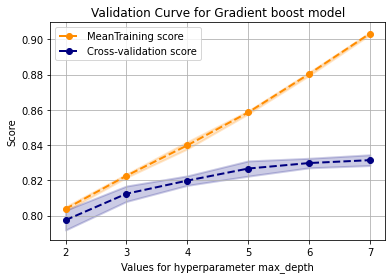

In [ ]:
plt.title("Validation Curve for Gradient boost model")
plt.xlabel("Values for hyperparameter max_depth")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)

lw = 2
plt.fill_between(max_depth2, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.fill_between(max_depth2, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(max_depth2, train_scores_mean, label="MeanTraining score",
             color="darkorange", lw=lw ,ls='--',marker ='o')

plt.plot(max_depth2, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw,ls='--',marker ='o')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
new=GradientBoostingClassifier(learning_rate=0.15, n_estimators=500,max_depth=6, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
new.fit(X_train,y_train)
print("  - NEW Gradient boosting Training score = ", new.score(X_train, y_train))
print("  - NEW Gradient boosting Testing score = ", new.score(X_test, y_test))

  - NEW Gradient boosting Training score =  0.9810392415696628
  - NEW Gradient boosting Testing score =  0.8572742909716389


In [ ]:
feature_importances_boost = pd.DataFrame(new.feature_importances_,
                                   index = X_traindf.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances_boost

,importance
0.0.37,0.060373
0.0.178,0.031776
0.0.354,0.031138
1.0.42,0.027585
0.0.295,0.020913
...,...
0.0.552,0.000043
1.0,0.000000
0.0.1,0.000000
1.0.1,0.000000


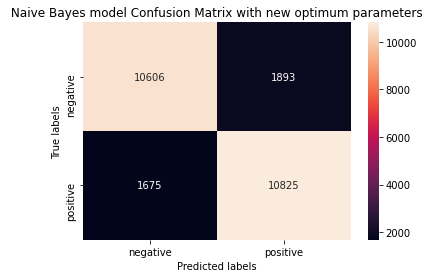

In [ ]:
cnf_matrix_new = confusion_matrix(y_test,new.predict(X_test))
ax= plt.subplot()
sns.heatmap(cnf_matrix_new, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title( ' Naive Bayes model Confusion Matrix with new optimum parameters ' ); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
feature_imp_boost = pd.Series(new.feature_importances_,X_traindf.columns).sort_values(ascending=False)
feature_imp_boost

0.0.37     0.060373
0.0.178    0.031776
0.0.354    0.031138
1.0.42     0.027585
0.0.295    0.020913
             ...   
0.0.552    0.000043
0.0.1      0.000000
1.0.1      0.000000
1.0        0.000000
0.0        0.000000
Length: 1000, dtype: float64

No handles with labels found to put in legend.


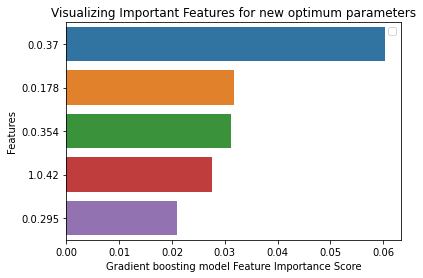

In [ ]:
sns.barplot(x=feature_imp_boost[0:5], y=feature_imp_boost.index[0:5])
# Add labels to your graph
plt.xlabel('Gradient boosting model Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for new optimum parameters")
plt.legend()
plt.show()

In [ ]:
#Evaluation of Model - Confusion Matrix Plot
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


